In [1]:
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# jupyter magic to display plots directly in the notebook
%matplotlib inline

# use vector graphics format for nicer plots
%config Inline.Backend.figure_format = 'svg'

%config Completer.use_jedi = False

%load_ext autoreload
%autoreload 2

In [2]:
DATA = 'data/RfqData.xlsx'

In [3]:
sheets = pd.ExcelFile(DATA).sheet_names
sheets

['Training RFQs', 'OOS RFQs', 'Competition RFQs']

In [4]:
training = pd.read_excel(DATA, sheet_name=sheets[0])
test = pd.read_excel(DATA, sheet_name=sheets[1])
competition = pd.read_excel(DATA, sheet_name=sheets[2])

In [5]:
training['quote_diff'] = training['QuotedPrice'] - training['MidPrice']
training['quote_diff_pct'] = (training['QuotedPrice'] - training['MidPrice'])/training['MidPrice']+1

training['nextmid_diff'] = training['NextMidPrice'] - training['MidPrice']
training['nextmid_diff_pct'] = (training['NextMidPrice'] - training['MidPrice'])/training['MidPrice']+1
training['log_notion'] = np.log(training['Notional'])

In [6]:
training.head()

,Time,Bond,Side,Notional,Counterparty,MidPrice,QuotedPrice,Competitors,Traded,NextMidPrice,quote_diff,quote_diff_pct,nextmid_diff,nextmid_diff_pct,log_notion
0,25000,Bond_2,Offer,10000000,Ctpy_0,124.01,124.25,1,MISSED,124.24,0.24,1.001935,0.23,1.001855,16.118096
1,25001,Bond_0,Bid,1000,Ctpy_1,98.07,98.06,1,DONE,98.08,-0.01,0.999898,0.01,1.000102,6.907755
2,25002,Bond_1,Offer,1000,Ctpy_1,170.30,170.40,1,MISSED,170.64,0.10,1.000587,0.34,1.001996,6.907755
3,25003,Bond_0,Bid,20000,Ctpy_0,98.00,97.98,4,DONE,97.94,-0.02,0.999796,-0.06,0.999388,9.903488
4,25004,Bond_1,Offer,1000,Ctpy_3,171.12,171.16,2,DONE,171.46,0.04,1.000234,0.34,1.001987,6.907755


In [7]:
training['Bond'].value_counts()

Bond_0    2515
Bond_2    1987
Bond_1     498
Name: Bond, dtype: int64

In [8]:
training['Counterparty'].value_counts()

Ctpy_3    2233
Ctpy_1    1497
Ctpy_0    1036
Ctpy_2     234
Name: Counterparty, dtype: int64

In [9]:
training['Competitors'].value_counts()

1    1320
2    1253
3    1218
4    1209
Name: Competitors, dtype: int64

### acf

### acf of bond 0

/Users/vishad.bhalodia/anaconda3/envs/mfe_env/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/Users/vishad.bhalodia/anaconda3/envs/mfe_env/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


<AxesSubplot:>

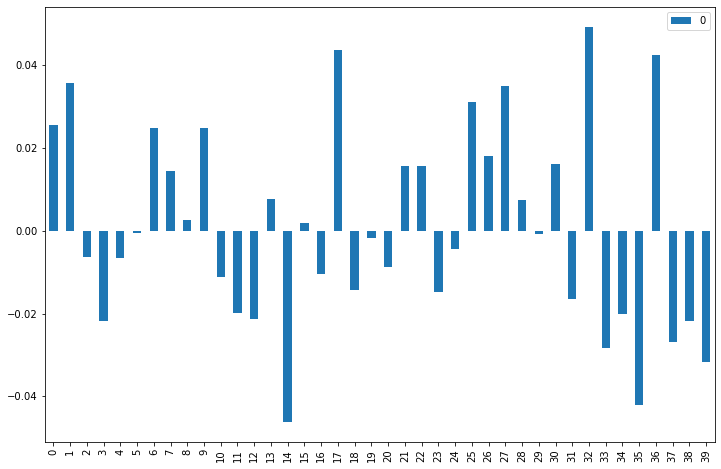

In [10]:
(pd.DataFrame(acf(training.loc[training['Bond']=='Bond_0','MidPrice'].iloc[:1200].reset_index(drop=True).pct_change().dropna())[1:])
.plot(kind='bar',figsize=(12,8)))

/Users/vishad.bhalodia/anaconda3/envs/mfe_env/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/Users/vishad.bhalodia/anaconda3/envs/mfe_env/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


<AxesSubplot:>

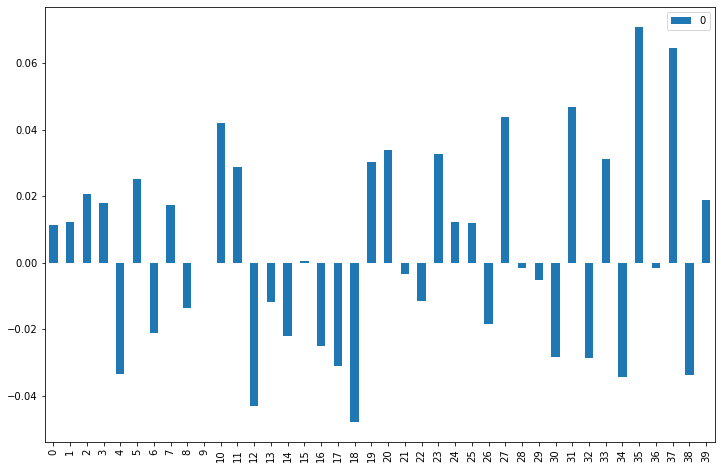

In [11]:
(pd.DataFrame(acf(training.loc[training['Bond']=='Bond_0','MidPrice'].iloc[1200:].reset_index(drop=True).pct_change().dropna())[1:])
.plot(kind='bar',figsize=(12,8)))

### acf bond 1

<AxesSubplot:>

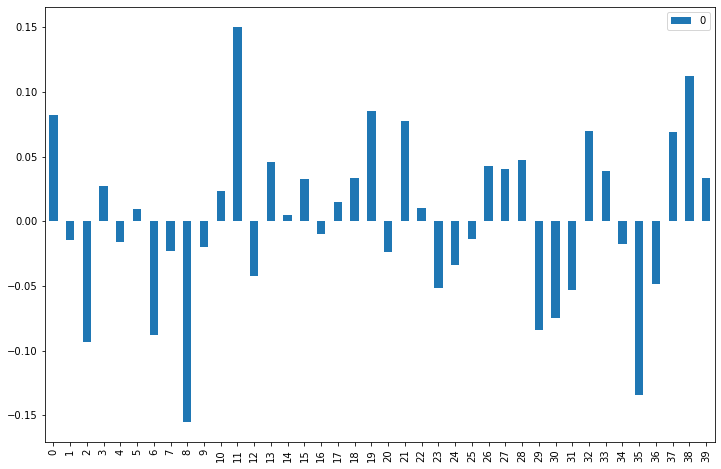

In [12]:
(pd.DataFrame(acf(training.loc[training['Bond']=='Bond_1','MidPrice'].iloc[:200].reset_index(drop=True).pct_change().dropna())[1:])
.plot(kind='bar',figsize=(12,8)))

<AxesSubplot:>

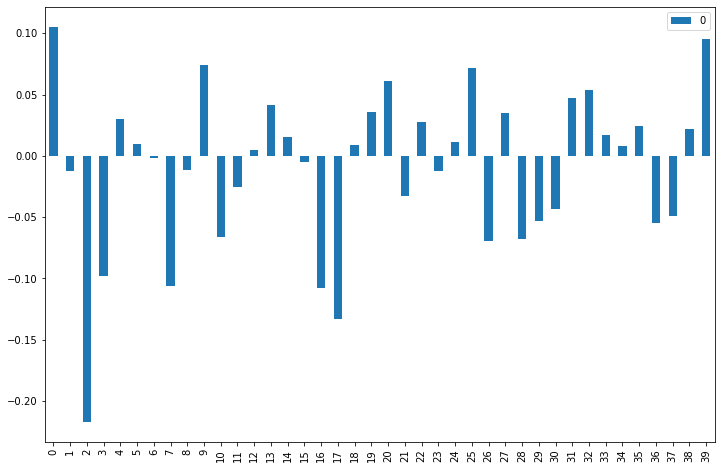

In [13]:
(pd.DataFrame(acf(training.loc[training['Bond']=='Bond_1','MidPrice'].iloc[200:].reset_index(drop=True).pct_change().dropna())[1:])
.plot(kind='bar',figsize=(12,8)))

<AxesSubplot:>

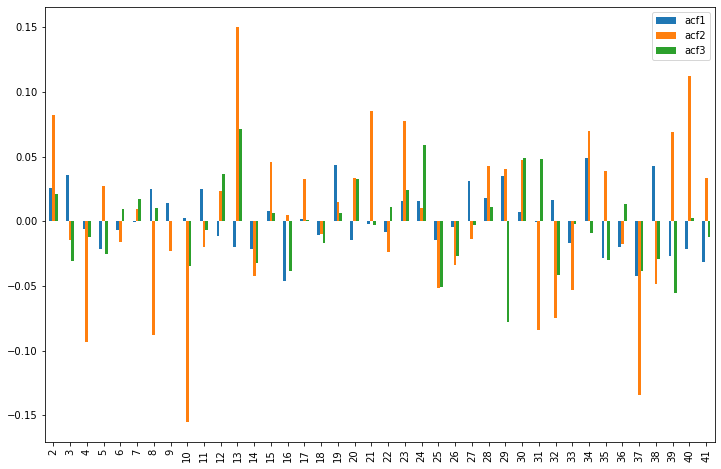

In [14]:
bonds0 =training.loc[training['Bond']=='Bond_0','MidPrice'].iloc[:1200].reset_index(drop=True)
bonds1 =training.loc[training['Bond']=='Bond_1','MidPrice'].iloc[:200].reset_index(drop=True)
bonds2 =training.loc[training['Bond']=='Bond_2','MidPrice'].iloc[:1000].reset_index(drop=True)

acf1 = acf(bonds0.pct_change().dropna())
acf2 = acf(bonds1.pct_change().dropna())
acf3 = acf(bonds2.pct_change().dropna())

test_df = pd.DataFrame([acf1, acf2, acf3]).T
test_df.columns = ['acf1','acf2','acf3']
test_df.index += 1
test_df[1:].plot(kind='bar',figsize=(12,8))

In [15]:
bonds1

0      170.30
1      171.12
2      172.14
3      172.17
4      171.85
        ...  
195    154.55
196    154.48
197    154.37
198    155.07
199    155.30
Name: MidPrice, Length: 200, dtype: float64

### times series

<AxesSubplot:>

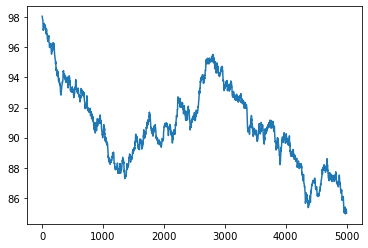

In [16]:
training.loc[training['Bond']=='Bond_0','MidPrice'].plot()

<AxesSubplot:>

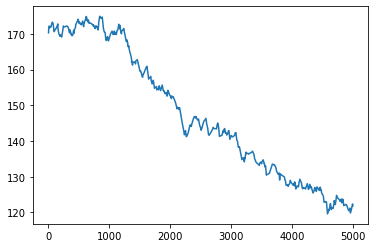

In [17]:
training.loc[training['Bond']=='Bond_1','MidPrice'].plot()

<AxesSubplot:>

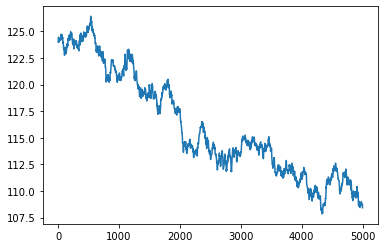

In [18]:
training.loc[training['Bond']=='Bond_2','MidPrice'].plot()

### log notional vs spread by customer

<AxesSubplot:xlabel='log_notion', ylabel='quote_diff_pct'>

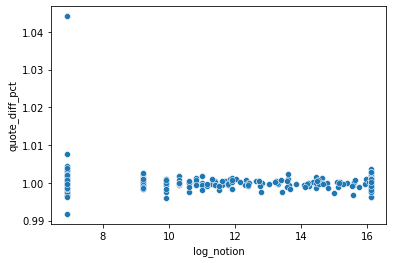

In [19]:
sns.scatterplot(x='log_notion',y='quote_diff_pct',data=training.loc[(training['Counterparty']=='Ctpy_0'),])

<AxesSubplot:xlabel='log_notion', ylabel='quote_diff_pct'>

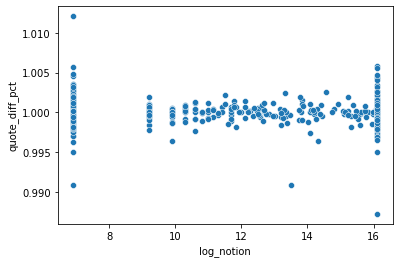

In [20]:
sns.scatterplot(x='log_notion',y='quote_diff_pct',data=training.loc[(training['Counterparty']=='Ctpy_1'),])

<AxesSubplot:xlabel='log_notion', ylabel='quote_diff_pct'>

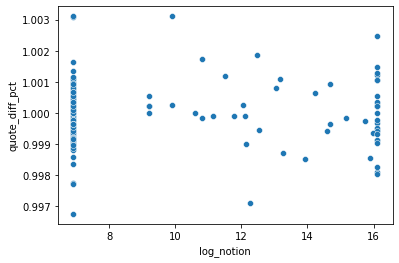

In [21]:
sns.scatterplot(x='log_notion',y='quote_diff_pct',data=training.loc[(training['Counterparty']=='Ctpy_2'),])

<AxesSubplot:xlabel='log_notion', ylabel='quote_diff_pct'>

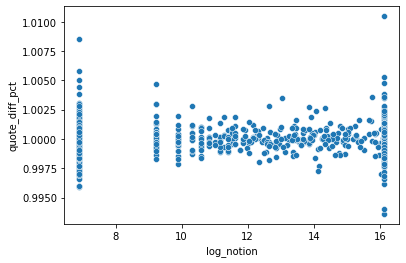

In [22]:
sns.scatterplot(x='log_notion',y='quote_diff_pct',data=training.loc[(training['Counterparty']=='Ctpy_3'),])

### std of spread compared to std of bond price

In [23]:
print('midprice std')

print(pd.DataFrame([training.loc[training['Counterparty']=='Ctpy_0','MidPrice'].rename('C0'), 
              training.loc[training['Counterparty']=='Ctpy_1','MidPrice'].rename('C1'),
              training.loc[training['Counterparty']=='Ctpy_2','MidPrice'].rename('C2'),
              training.loc[training['Counterparty']=='Ctpy_2','MidPrice'].rename('C3')]).T.std())

print('quote diff std')

print(pd.DataFrame([training.loc[training['Counterparty']=='Ctpy_0','quote_diff'].rename('C0'), 
              training.loc[training['Counterparty']=='Ctpy_1','quote_diff'].rename('C1'),
              training.loc[training['Counterparty']=='Ctpy_2','quote_diff'].rename('C2'),
              training.loc[training['Counterparty']=='Ctpy_3','quote_diff'].rename('C3')]).T.std())

print('quote diff pct std')

print(pd.DataFrame([training.loc[training['Counterparty']=='Ctpy_0','quote_diff_pct'].rename('C0'), 
              training.loc[training['Counterparty']=='Ctpy_1','quote_diff_pct'].rename('C1'),
              training.loc[training['Counterparty']=='Ctpy_2','quote_diff_pct'].rename('C2'),
              training.loc[training['Counterparty']=='Ctpy_3','quote_diff_pct'].rename('C3')]).T.std())


# print('nextmid diff std')
# print(pd.DataFrame([training.loc[training['Bond']=='Bond_0','nextmid_diff'].rename('Bond0'), 
#               training.loc[training['Bond']=='Bond_1','nextmid_diff'].rename('Bond1'),
#               training.loc[training['Bond']=='Bond_2','nextmid_diff'].rename('Bond2')]).T.std())

# print('next mid diff pct std')
# print(pd.DataFrame([training.loc[training['Bond']=='Bond_0','nextmid_diff_pct'].rename('Bond0'), 
#               training.loc[training['Bond']=='Bond_1','nextmid_diff_pct'].rename('Bond1'),
#               training.loc[training['Bond']=='Bond_2','nextmid_diff_pct'].rename('Bond2')]).T.std())

midprice std
C0    19.499516
C1    19.122934
C2    19.272221
C3    19.272221
dtype: float64
quote diff std
C0    0.160997
C1    0.114351
C2    0.093528
C3    0.100940
dtype: float64
quote diff pct std
C0    0.001649
C1    0.001069
C2    0.000836
C3    0.000921
dtype: float64


In [24]:
#normalizing by price isnt good enough need to normalize by std of bond price up to that point?
#algo: divide into 3 datasets preserving all columns perform the calculation and shift and then recombined using time as the index?

In [25]:
#probably want std of quesses to be less than realized next mid diff

### how much does the market move when the counterparty trades?

In [26]:
for n in np.arange(4):
    notional = training.loc[training['Counterparty']=='Ctpy_'+str(n),'Notional'].abs().mean()
    movement = training.loc[training['Counterparty']=='Ctpy_'+str(n),'nextmid_diff'].abs().mean()
    print('counterparty'+str(n))
    print('notional:                              ',round(notional,2))
    print('movement from current mid to next mid: ',round(movement,4))
    print('movement/notional * scaling:           ',round((movement/notional)*10**8,2))

counterparty0
notional:                               1383446.91
movement from current mid to next mid:  0.0651
movement/notional * scaling:            4.71
counterparty1
notional:                               1616066.13
movement from current mid to next mid:  0.1039
movement/notional * scaling:            6.43
counterparty2
notional:                               1284649.57
movement from current mid to next mid:  0.0693
movement/notional * scaling:            5.39
counterparty3
notional:                               1376676.22
movement from current mid to next mid:  0.0998
movement/notional * scaling:            7.25


In [27]:
#counterparty 0 is lazy midwestern pension
#counterparty 1 is pretty good but very large hedgefund
#counterparty 2 is the average fund
#counterparty 3 is the shark

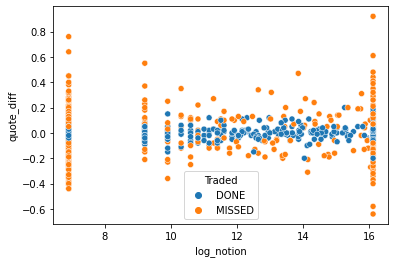

In [28]:
sns.scatterplot(x='log_notion',y='quote_diff', data=training.loc[training['Counterparty']=='Ctpy_3',], hue='Traded')
plt.show()